# Importing Libraries

In [50]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [51]:
df=pd.read_csv(r"C:\Users\manit\OneDrive\Documents\GitHub\data_science_project\database.csv")
df.sample(8)

Vehicle ID  Year     Make              Model  \
7797         6341  1989      GMC    Jimmy V1500 4WD   
25457       23674  2007    Dodge  Dakota Pickup 4WD   
19592       17177  2001   Suzuki   Grand Vitara XL7   
11066        8882  1992     Ford              Tempo   
18916       16843  2001    Buick        Park Avenue   
21408       18809  2003  Mercury        Sable Wagon   
16250       13413  1997   Toyota            Corolla   
30995       31302  2012      BMW       X6 xDrive35i   

                             Class                       Drive  \
7797      Special Purpose Vehicles  4-Wheel or All-Wheel Drive   
25457   Standard Pickup Trucks 4WD  4-Wheel or All-Wheel Drive   
19592  Sport Utility Vehicle - 2WD            Rear-Wheel Drive   
11066                 Compact Cars           Front-Wheel Drive   
18916                   Large Cars           Front-Wheel Drive   
21408       Midsize Station Wagons           Front-Wheel Drive   
16250              Subcompact Cars           Front-Wheel Drive   
30995  Sport Utility Vehicle - 4WD             All-Wheel Drive   

            Transmission Transmission Descriptor  Engine Index  \
7797   Automatic 4-Speed                   CLKUP          4941   
25457     Manual 6-Speed                     NaN             0   
19592  Automatic 4-Speed             2MODE 2LKUP             0   
11066     Manual 5-Speed                     NaN          3301   
18916  Automatic 4-Speed                   CLKUP             0   
21408  Automatic 4-Speed                   CLKUP             0   
16250     Manual 5-Speed                     NaN         57001   
30995     Automatic (S8)                     NaN           671   

      Engine Descriptor  ...  Hours to Charge (AC 240V)  Composite City MPG  \
7797     (350 V8) (FFS)  ...                        0.0                   0   
25457               NaN  ...                        0.0                   0   
19592               NaN  ...                        0.0                   0   
11066             (FFS)  ...                        0.0                   0   
18916               NaN  ...                        0.0                   0   
21408           2-VALVE  ...                        0.0                   0   
16250             (FFS)  ...                        0.0                   0   
30995              SIDI  ...                        0.0                   0   

      Composite Highway MPG Composite Combined MPG Range (FT1)  \
7797                      0                      0           0   
25457                     0                      0           0   
19592                     0                      0           0   
11066                     0                      0           0   
18916                     0                      0           0   
21408                     0                      0           0   
16250                     0                      0           0   
30995                     0                      0           0   

      City Range (FT1) Highway Range (FT1)  Range (FT2)  City Range (FT2)  \
7797               0.0                 0.0          NaN               0.0   
25457              0.0                 0.0          NaN               0.0   
19592              0.0                 0.0          NaN               0.0   
11066              0.0                 0.0          NaN               0.0   
18916              0.0                 0.0          NaN               0.0   
21408              0.0                 0.0          NaN               0.0   
16250              0.0                 0.0          NaN               0.0   
30995              0.0                 0.0          NaN               0.0   

       Highway Range (FT2)  
7797                   0.0  
25457                  0.0  
19592                  0.0  
11066                  0.0  
18916                  0.0  
21408                  0.0  
16250                  0.0  
30995                  0.0  

[8 rows x 81 columns]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vehicle ID                           38113 non-null  int64  
 1   Year                                 38113 non-null  int64  
 2   Make                                 38113 non-null  object 
 3   Model                                38113 non-null  object 
 4   Class                                38113 non-null  object 
 5   Drive                                36924 non-null  object 
 6   Transmission                         38102 non-null  object 
 7   Transmission Descriptor              15045 non-null  object 
 8   Engine Index                         38113 non-null  int64  
 9   Engine Descriptor                    22693 non-null  object 
 10  Engine Cylinders                     37977 non-null  float64
 11  Engine Displacement         

## Feature Engineering
**Feature engineering or feature extraction is the process of extracting features such as characteristics, properties, attributes from raw datasets**

In [66]:
# dropping columns which contains more that 40% missing data
for column in df.columns:
    missing_value=df[column].isnull().sum()/len(df)
    if missing_value>.4:
        df=df.drop(column, axis=1)

**imbalance data which refers to those types of datasets where the target class has an uneven distribution of observations,
i.e one class label has a very high number of observations and the other has a very low number of observations.**

In [63]:
# Dropping Off column which conatins imbalance Data
for column in df.columns:
    try:
        ratio=df[column].value_counts()[0]/len(df)
        if ratio>.9:
            df=df.drop(column, axis=1)
    except:
        # columns whose ratios cannot be calculated
        print(column)
        

Vehicle ID
Year
Engine Cylinders
City MPG (FT1)
Highway MPG (FT1)
Combined MPG (FT1)
Annual Fuel Cost (FT1)
Annual Consumption in Barrels (FT1)
Tailpipe CO2 (FT2)
Fuel Economy Score
GHG Score


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vehicle ID                           38113 non-null  int64  
 1   Year                                 38113 non-null  int64  
 2   Make                                 38113 non-null  object 
 3   Model                                38113 non-null  object 
 4   Class                                38113 non-null  object 
 5   Drive                                36924 non-null  object 
 6   Transmission                         38102 non-null  object 
 7   Engine Index                         38113 non-null  int64  
 8   Engine Cylinders                     37977 non-null  float64
 9   Engine Displacement                  37979 non-null  float64
 10  Fuel Type                            38113 non-null  object 
 11  Fuel Type 1                 

#### Only 35 columns remaining out of 80 !

**missingno is a quick and easy way used to visualize missing values in the datasets**

<Axes: >

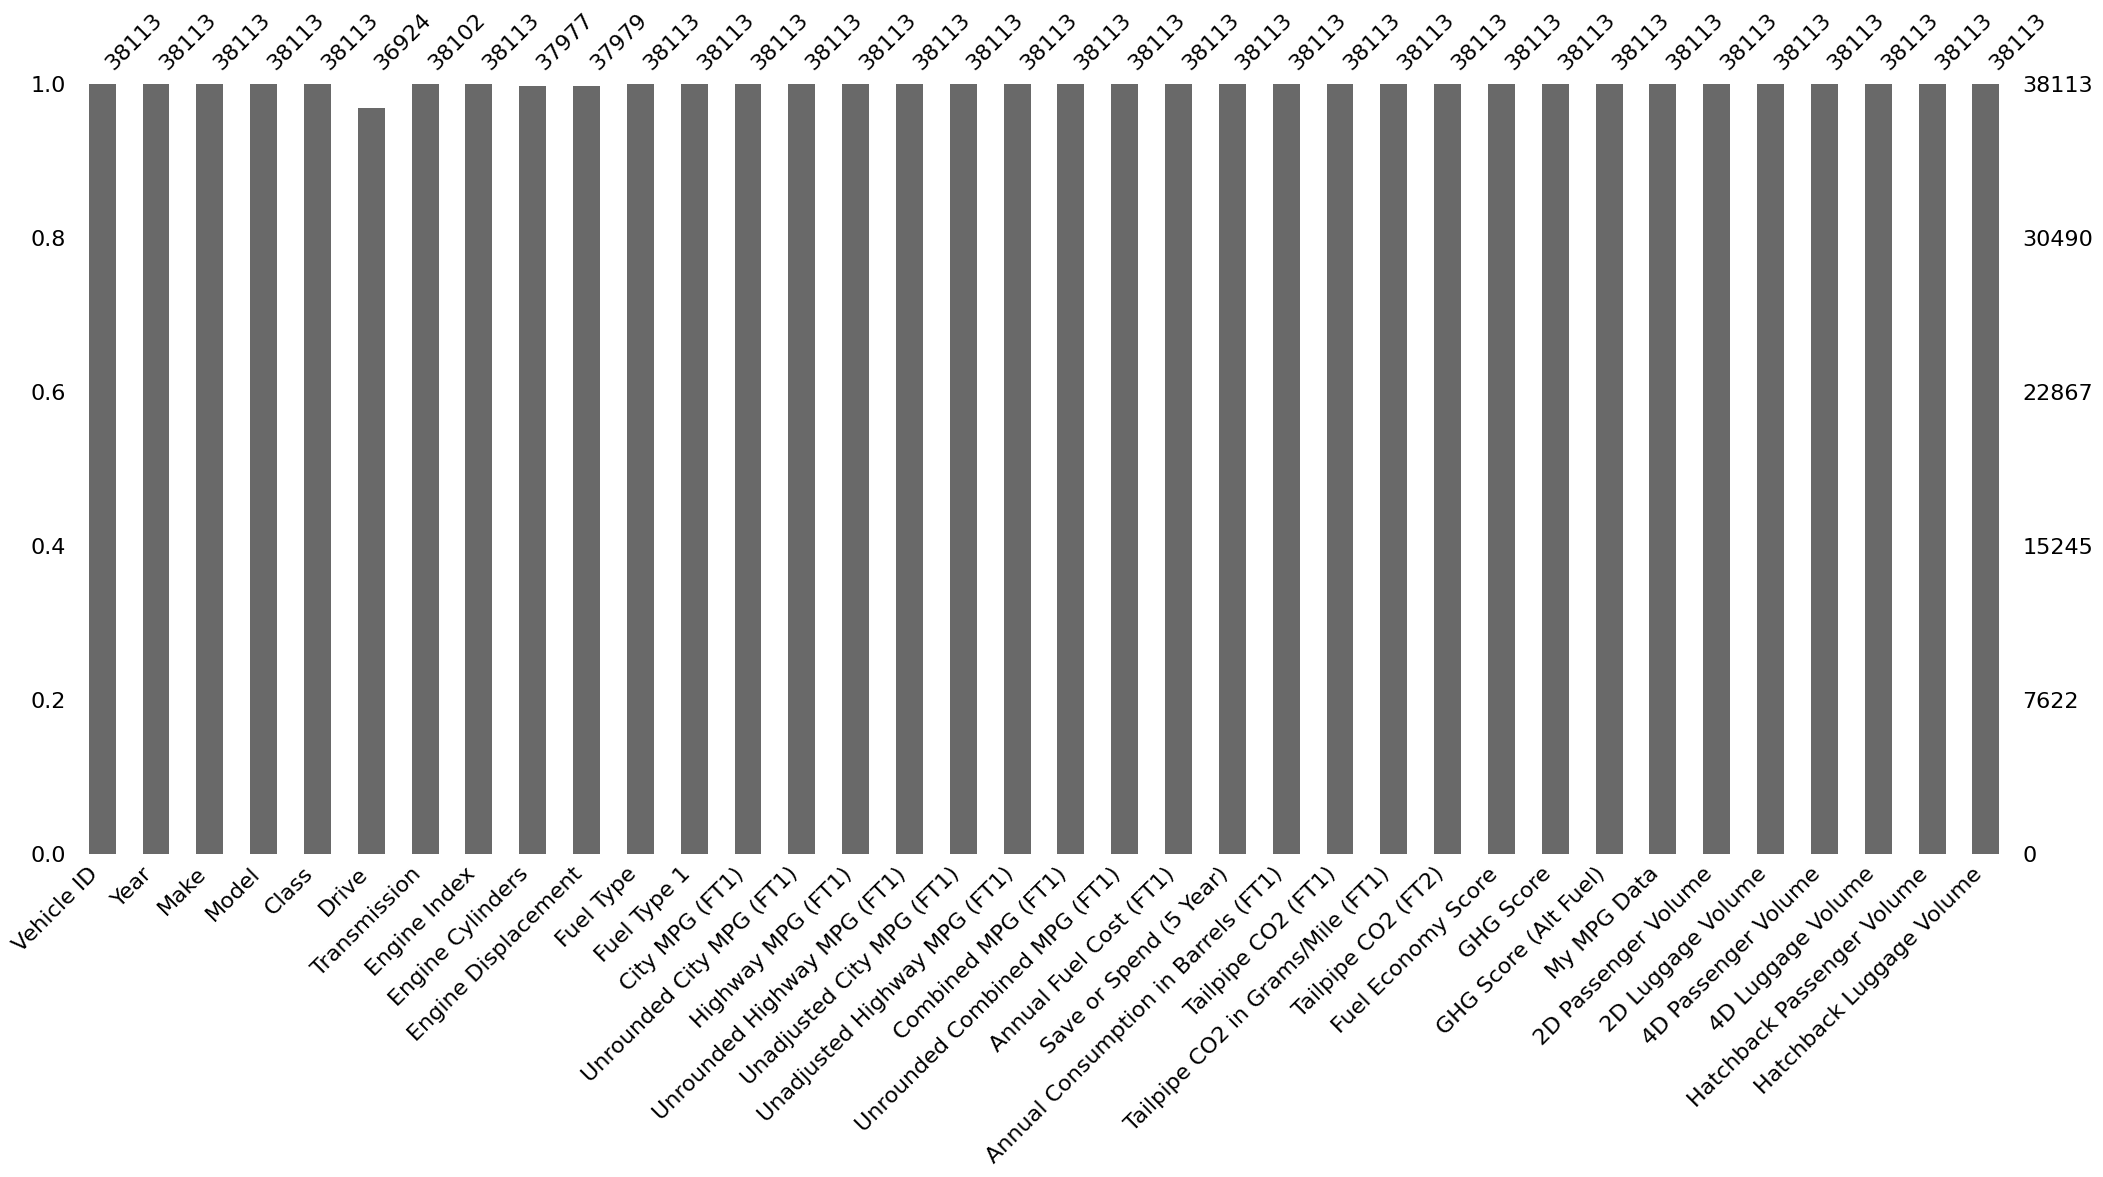

In [67]:
import missingno as msno
msno.bar(df)

In [68]:
df.dropna(inplace=True)

In [69]:
df.columns

Index(['Vehicle ID', 'Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
       'Engine Index', 'Engine Cylinders', 'Engine Displacement', 'Fuel Type',
       'Fuel Type 1', 'City MPG (FT1)', 'Unrounded City MPG (FT1)',
       'Highway MPG (FT1)', 'Unrounded Highway MPG (FT1)',
       'Unadjusted City MPG (FT1)', 'Unadjusted Highway MPG (FT1)',
       'Combined MPG (FT1)', 'Unrounded Combined MPG (FT1)',
       'Annual Fuel Cost (FT1)', 'Save or Spend (5 Year)',
       'Annual Consumption in Barrels (FT1)', 'Tailpipe CO2 (FT1)',
       'Tailpipe CO2 in Grams/Mile (FT1)', 'Tailpipe CO2 (FT2)',
       'Fuel Economy Score', 'GHG Score', 'GHG Score (Alt Fuel)',
       'My MPG Data', '2D Passenger Volume', '2D Luggage Volume',
       '4D Passenger Volume', '4D Luggage Volume',
       'Hatchback Passenger Volume', 'Hatchback Luggage Volume'],
      dtype='object')

In [70]:
df=df.drop('Vehicle ID',axis=1)

In [71]:
df=df.set_index('Year')

In [72]:
cdf=df.groupby('Year', as_index=False)

In [73]:
cdf.head()

Make              Model  \
Year                                                   
1984                   AM General  DJ Po Vehicle 2WD   
1984                   AM General  DJ Po Vehicle 2WD   
1984                   AM General   FJ8c Post Office   
1984                   AM General   FJ8c Post Office   
1984  American Motors Corporation          Eagle 4WD   
...                           ...                ...   
2017                        Acura                ILX   
2017                        Acura            MDX AWD   
2017                        Acura            MDX AWD   
2017                        Acura            MDX FWD   
2017                        Acura            MDX FWD   

                                Class                       Drive  \
Year                                                                
1984      Special Purpose Vehicle 2WD               2-Wheel Drive   
1984      Special Purpose Vehicle 2WD               2-Wheel Drive   
1984      Special Purpose Vehicle 2WD               2-Wheel Drive   
1984      Special Purpose Vehicle 2WD               2-Wheel Drive   
1984      Special Purpose Vehicle 4WD  4-Wheel or All-Wheel Drive   
...                               ...                         ...   
2017                     Compact Cars           Front-Wheel Drive   
2017  Small Sport Utility Vehicle 4WD             All-Wheel Drive   
2017  Small Sport Utility Vehicle 4WD             All-Wheel Drive   
2017  Small Sport Utility Vehicle 2WD           Front-Wheel Drive   
2017  Small Sport Utility Vehicle 2WD           Front-Wheel Drive   

           Transmission  Engine Index  Engine Cylinders  Engine Displacement  \
Year                                                                           
1984  Automatic 3-Speed          1830               4.0                  2.5   
1984  Automatic 3-Speed          1880               4.0                  2.5   
1984  Automatic 3-Speed          1831               6.0                  4.2   
1984  Automatic 3-Speed          1881               6.0                  4.2   
1984  Automatic 3-Speed          1524               6.0                  4.2   
...                 ...           ...               ...                  ...   
2017        Auto(AM-S8)             4               4.0                  2.4   
2017     Automatic (S9)            22               6.0                  3.5   
2017     Automatic (S9)            23               6.0                  3.5   
2017     Automatic (S9)            20               6.0                  3.5   
2017     Automatic (S9)            21               6.0                  3.5   

     Fuel Type       Fuel Type 1  ...  Fuel Economy Score  GHG Score  \
Year                              ...                                  
1984   Regular  Regular Gasoline  ...                  -1         -1   
1984   Regular  Regular Gasoline  ...                  -1         -1   
1984   Regular  Regular Gasoline  ...                  -1         -1   
1984   Regular  Regular Gasoline  ...                  -1         -1   
1984   Regular  Regular Gasoline  ...                  -1         -1   
...        ...               ...  ...                 ...        ...   
2017   Premium  Premium Gasoline  ...                   7          7   
2017   Premium  Premium Gasoline  ...                   5          5   
2017   Premium  Premium Gasoline  ...                   4          4   
2017   Premium  Premium Gasoline  ...                   5          5   
2017   Premium  Premium Gasoline  ...                   5          5   

      GHG Score (Alt Fuel)  My MPG Data  2D Passenger Volume  \
Year                                                           
1984                    -1            N                    0   
1984                    -1            N                    0   
1984                    -1            N                    0   
1984                    -1            N                    0   
1984                    -1            N 

In [74]:
# making a dataframe contains less than 10 unique values
my_col=[]
for column in df.columns:
    if df[column].nunique()<10:
        my_col.append(column)

my_data=df[my_col]

In [75]:
my_data.head()

Drive  Engine Cylinders       Fuel Type 1  \
Year                                                                   
1984               2-Wheel Drive               4.0  Regular Gasoline   
1984               2-Wheel Drive               4.0  Regular Gasoline   
1984               2-Wheel Drive               6.0  Regular Gasoline   
1984               2-Wheel Drive               6.0  Regular Gasoline   
1984  4-Wheel or All-Wheel Drive               6.0  Regular Gasoline   

     My MPG Data  
Year              
1984           N  
1984           N  
1984           N  
1984           N  
1984           N

In [76]:
my_data.shape

(36794, 4)

## Exploratory Data Analysis
* EDA is a data analytics process to understand the data in depth and learn the different data characteristics, often with visual means.

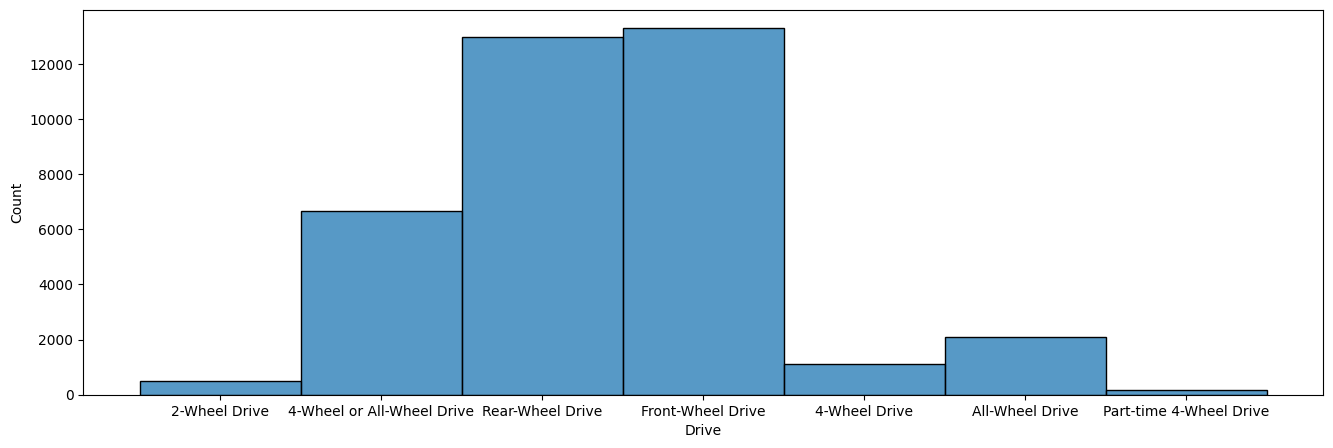

In [77]:
plt.subplots(figsize=(16,5))
sns.histplot(my_data['Drive'])
px.pie(my_data, names='Drive', hole=.3, title="Distribution based upon type of Drives")

In [78]:
px.pie(df, names='GHG Score', hole=.4,title="Distribution of vehicles based upon GHG Score")

In [79]:
px.pie(my_data, names='Engine Cylinders', hole=.35, title="Distribution based upon Number of Cylinders")

In [80]:
df.head()

Make              Model  \
Year                                                   
1984                   AM General  DJ Po Vehicle 2WD   
1984                   AM General  DJ Po Vehicle 2WD   
1984                   AM General   FJ8c Post Office   
1984                   AM General   FJ8c Post Office   
1984  American Motors Corporation          Eagle 4WD   

                            Class                       Drive  \
Year                                                            
1984  Special Purpose Vehicle 2WD               2-Wheel Drive   
1984  Special Purpose Vehicle 2WD               2-Wheel Drive   
1984  Special Purpose Vehicle 2WD               2-Wheel Drive   
1984  Special Purpose Vehicle 2WD               2-Wheel Drive   
1984  Special Purpose Vehicle 4WD  4-Wheel or All-Wheel Drive   

           Transmission  Engine Index  Engine Cylinders  Engine Displacement  \
Year                                                                           
1984  Automatic 3-Speed          1830               4.0                  2.5   
1984  Automatic 3-Speed          1880               4.0                  2.5   
1984  Automatic 3-Speed          1831               6.0                  4.2   
1984  Automatic 3-Speed          1881               6.0                  4.2   
1984  Automatic 3-Speed          1524               6.0                  4.2   

     Fuel Type       Fuel Type 1  ...  Fuel Economy Score  GHG Score  \
Year                              ...                                  
1984   Regular  Regular Gasoline  ...                  -1         -1   
1984   Regular  Regular Gasoline  ...                  -1         -1   
1984   Regular  Regular Gasoline  ...                  -1         -1   
1984   Regular  Regular Gasoline  ...                  -1         -1   
1984   Regular  Regular Gasoline  ...                  -1         -1   

      GHG Score (Alt Fuel)  My MPG Data  2D Passenger Volume  \
Year                                                           
1984                    -1            N                    0   
1984                    -1            N                    0   
1984                    -1            N                    0   
1984                    -1            N                    0   
1984                    -1            N                    0   

      2D Luggage Volume  4D Passenger Volume  4D Luggage Volume  \
Year                                                              
1984                  0                    0                  0   
1984                  0                    0                  0   
1984                  0                    0                  0   
1984                  0                    0                  0   
1984                  0                    0                  0   

      Hatchback Passenger Volume  Hatchback Luggage Volume  
Year                                                        
1984                           0                         0  
1984                           0                         0  
1984                           0                         0  
1984                           0                         0  
1984                           0                         0  

[5 rows x 34 columns]

In [81]:
df.columns

Index(['Make', 'Model', 'Class', 'Drive', 'Transmission', 'Engine Index',
       'Engine Cylinders', 'Engine Displacement', 'Fuel Type', 'Fuel Type 1',
       'City MPG (FT1)', 'Unrounded City MPG (FT1)', 'Highway MPG (FT1)',
       'Unrounded Highway MPG (FT1)', 'Unadjusted City MPG (FT1)',
       'Unadjusted Highway MPG (FT1)', 'Combined MPG (FT1)',
       'Unrounded Combined MPG (FT1)', 'Annual Fuel Cost (FT1)',
       'Save or Spend (5 Year)', 'Annual Consumption in Barrels (FT1)',
       'Tailpipe CO2 (FT1)', 'Tailpipe CO2 in Grams/Mile (FT1)',
       'Tailpipe CO2 (FT2)', 'Fuel Economy Score', 'GHG Score',
       'GHG Score (Alt Fuel)', 'My MPG Data', '2D Passenger Volume',
       '2D Luggage Volume', '4D Passenger Volume', '4D Luggage Volume',
       'Hatchback Passenger Volume', 'Hatchback Luggage Volume'],
      dtype='object')

In [82]:
df.nunique().head(40)

Make                                    127
Model                                  3662
Class                                    34
Drive                                     7
Transmission                             45
Engine Index                           2494
Engine Cylinders                          9
Engine Displacement                      65
Fuel Type                                13
Fuel Type 1                               5
City MPG (FT1)                           52
Unrounded City MPG (FT1)               3076
Highway MPG (FT1)                        50
Unrounded Highway MPG (FT1)            3250
Unadjusted City MPG (FT1)              6604
Unadjusted Highway MPG (FT1)           6823
Combined MPG (FT1)                       49
Unrounded Combined MPG (FT1)           4393
Annual Fuel Cost (FT1)                   58
Save or Spend (5 Year)                   60
Annual Consumption in Barrels (FT1)     135
Tailpipe CO2 (FT1)                      505
Tailpipe CO2 in Grams/Mile (FT1)

<Axes: xlabel='Year', ylabel='Engine Displacement'>

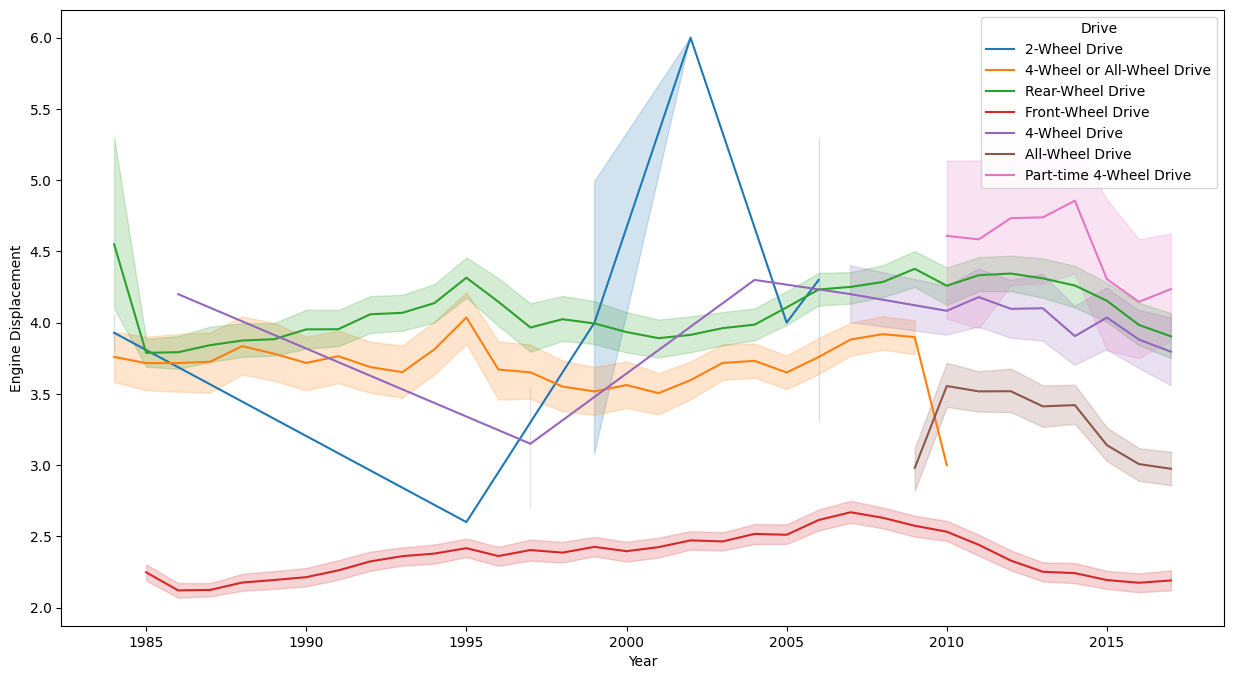

In [83]:
plt.figure(figsize=(15,8))
sns.lineplot(df, x='Year', y='Engine Displacement', hue='Drive')

<Axes: xlabel='Year', ylabel='Annual Consumption in Barrels (FT1)'>

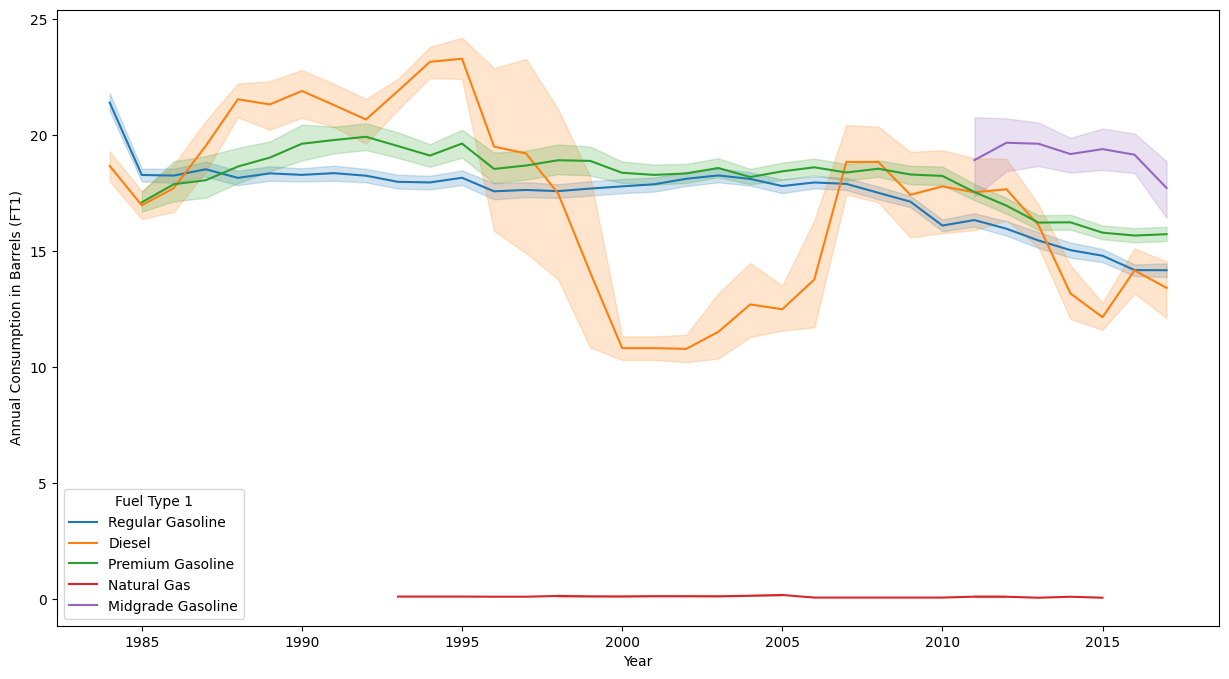

In [84]:
plt.figure(figsize=(15,8))
sns.lineplot(df, x='Year', y='Annual Consumption in Barrels (FT1)', hue='Fuel Type 1')

<Axes: xlabel='Year', ylabel='Tailpipe CO2 in Grams/Mile (FT1)'>

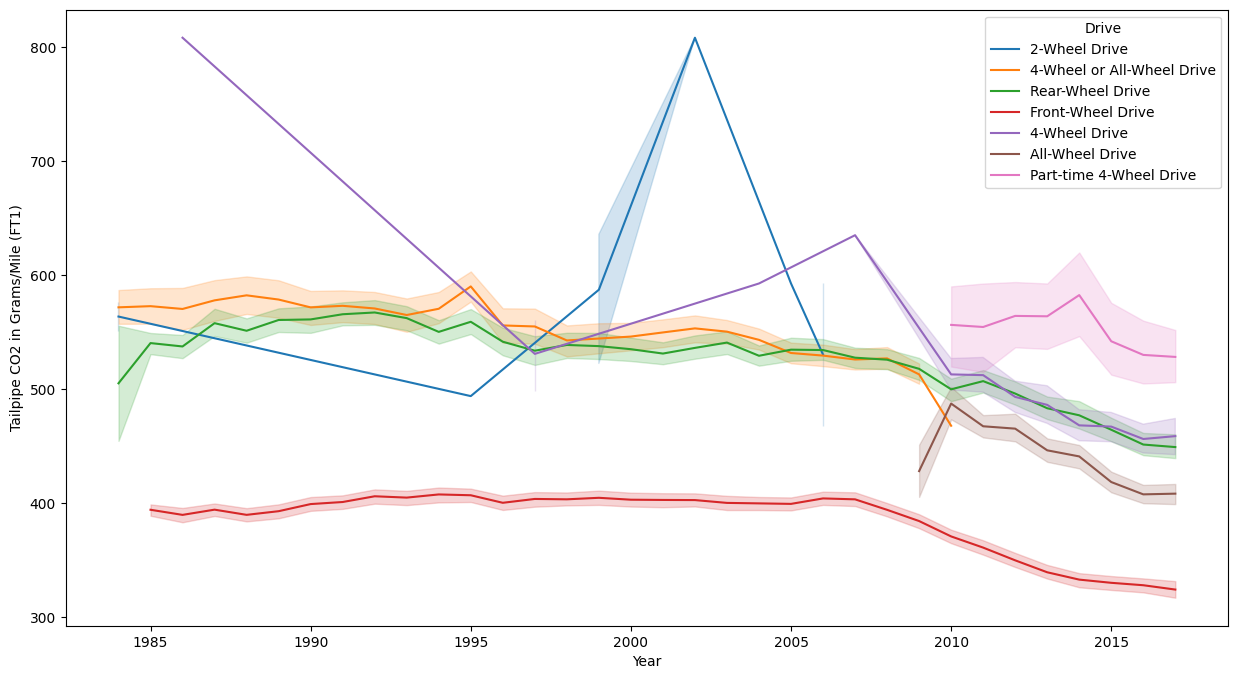

In [85]:
plt.figure(figsize=(15,8))
sns.lineplot(df, x='Year', y='Tailpipe CO2 in Grams/Mile (FT1)', hue='Drive')

<Axes: xlabel='Year', ylabel='Highway MPG (FT1)'>

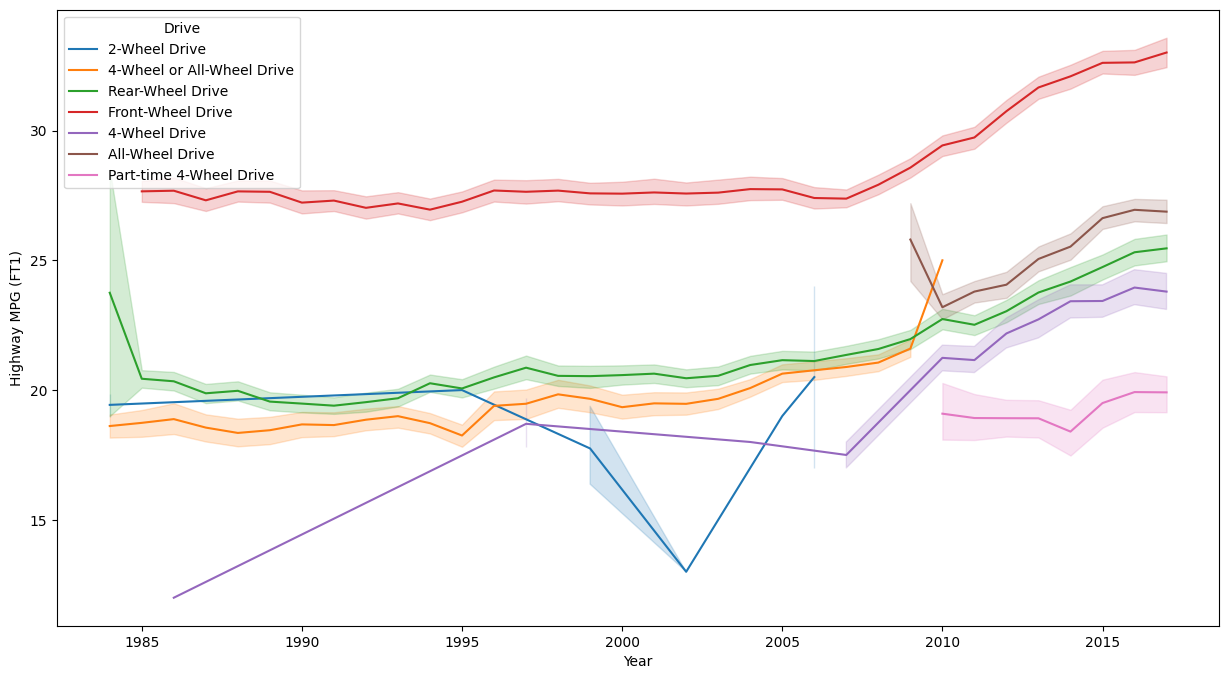

In [86]:
plt.figure(figsize=(15,8))
sns.lineplot(df, x='Year', y='Highway MPG (FT1)', hue='Drive')

<Axes: xlabel='Year', ylabel='Highway MPG (FT1)'>

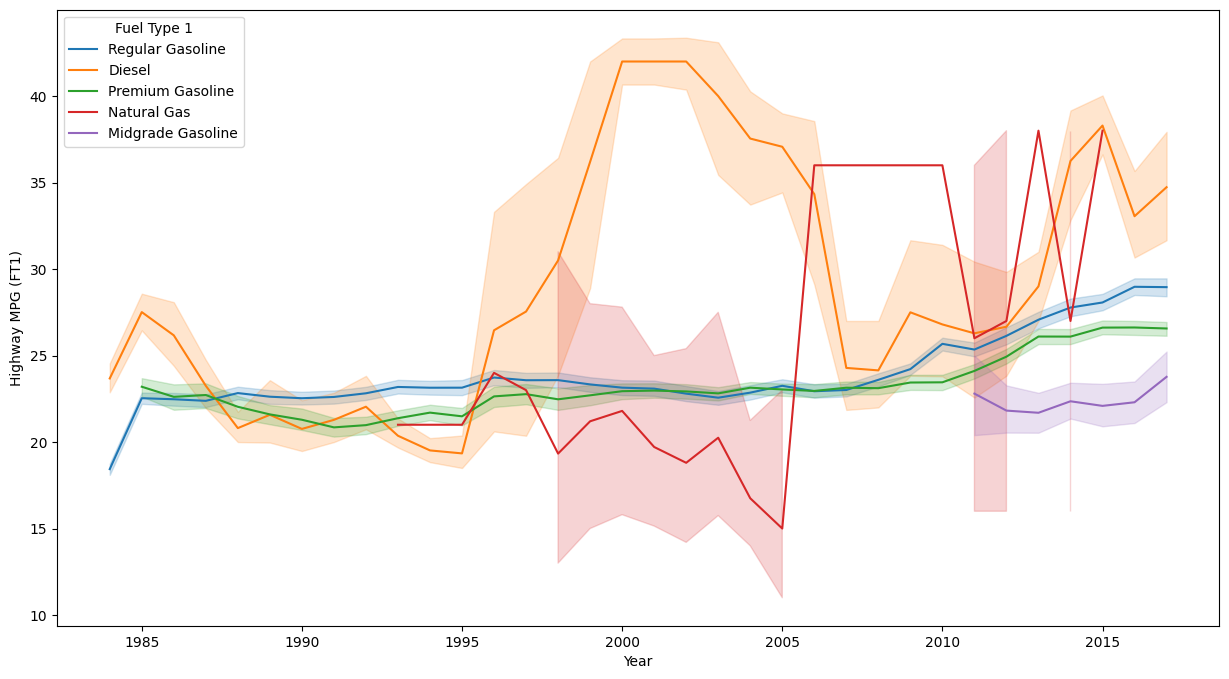

In [87]:
plt.figure(figsize=(15,8))
sns.lineplot(df, x='Year', y='Highway MPG (FT1)', hue='Fuel Type 1')

In [88]:
df.columns

Index(['Make', 'Model', 'Class', 'Drive', 'Transmission', 'Engine Index',
       'Engine Cylinders', 'Engine Displacement', 'Fuel Type', 'Fuel Type 1',
       'City MPG (FT1)', 'Unrounded City MPG (FT1)', 'Highway MPG (FT1)',
       'Unrounded Highway MPG (FT1)', 'Unadjusted City MPG (FT1)',
       'Unadjusted Highway MPG (FT1)', 'Combined MPG (FT1)',
       'Unrounded Combined MPG (FT1)', 'Annual Fuel Cost (FT1)',
       'Save or Spend (5 Year)', 'Annual Consumption in Barrels (FT1)',
       'Tailpipe CO2 (FT1)', 'Tailpipe CO2 in Grams/Mile (FT1)',
       'Tailpipe CO2 (FT2)', 'Fuel Economy Score', 'GHG Score',
       'GHG Score (Alt Fuel)', 'My MPG Data', '2D Passenger Volume',
       '2D Luggage Volume', '4D Passenger Volume', '4D Luggage Volume',
       'Hatchback Passenger Volume', 'Hatchback Luggage Volume'],
      dtype='object')

plt.figure(figsize=(15,8))
sns.scatterplot(df, y='Tailpipe CO2 in Grams/Mile (FT1)', x='Highway MPG (FT1)', hue='Fuel Type 1', size='GHG Score')

plt.figure(figsize=(15,8))
sns.scatterplot(df, y='Tailpipe CO2 in Grams/Mile (FT1)', x='City MPG (FT1)', hue='Fuel Type 1', size='GHG Score')

<Axes: xlabel='Highway MPG (FT1)', ylabel='Annual Fuel Cost (FT1)'>

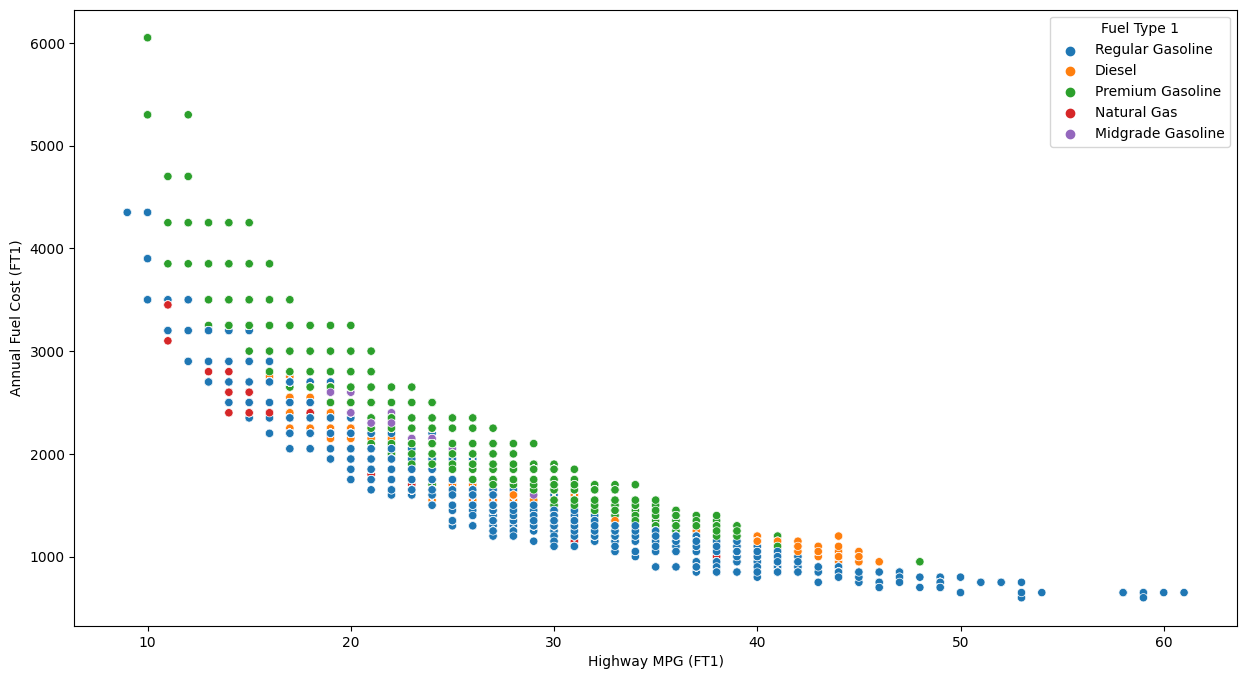

In [91]:
plt.figure(figsize=(15,8))
sns.scatterplot(df, y='Annual Fuel Cost (FT1)', x='Highway MPG (FT1)', hue='Fuel Type 1') 

<Axes: xlabel='Highway MPG (FT1)', ylabel='Annual Fuel Cost (FT1)'>

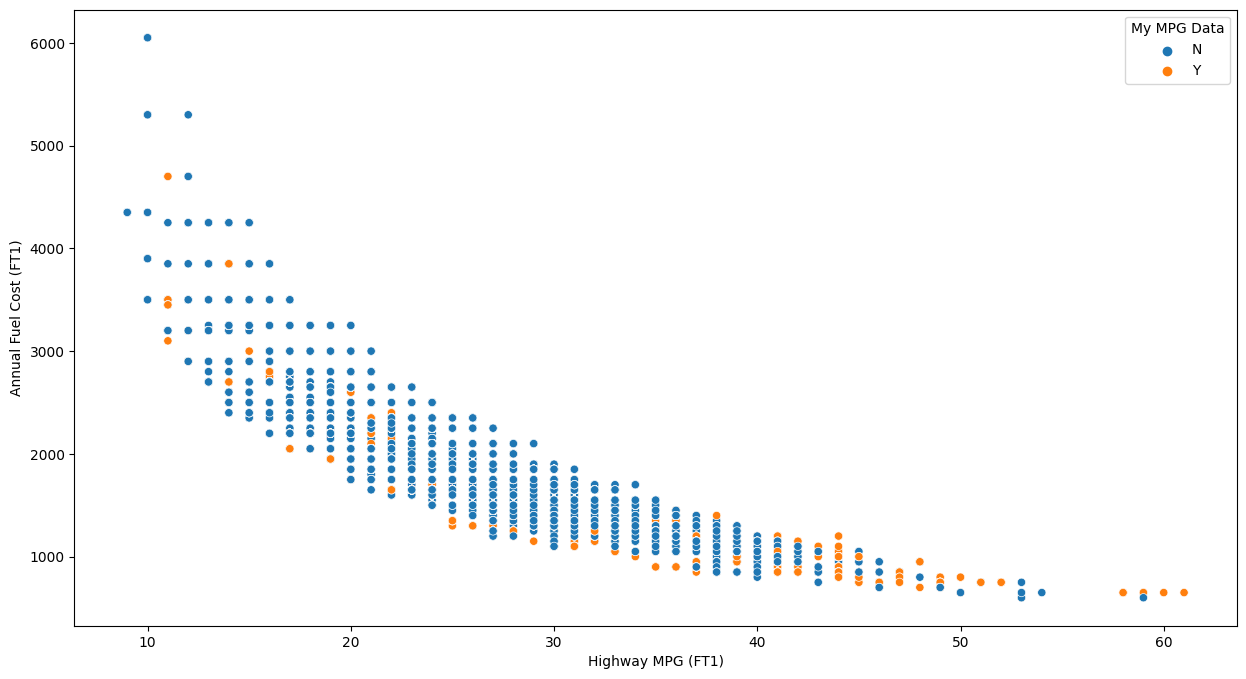

In [92]:
plt.figure(figsize=(15,8))
sns.scatterplot(df, y='Annual Fuel Cost (FT1)', x='Highway MPG (FT1)', hue='My MPG Data')